# Using Yellowbrick for Machine Learning Visualizations on Facebook Data

Paul Witt

The dataset below was provided to the UCI Machine Learning Repository from researchers who used Neural Networks and Decision Trees to predict how many comments a given Facebook post would generate. 

There are five variants of the dataset. This notebook only uses the first. 

The full paper can be found here: 

http://uksim.info/uksim2015/data/8713a015.pdf


### The primary purpose of this notebook is to test Yellowbrick. 

# Attribute Information:


All features are integers or float values. 


1 
Page Popularity/likes 
Decimal Encoding 
Page feature 
Defines the popularity or support for the source of the document. 


2 
Page Checkinsâ€™s 
Decimal Encoding 
Page feature 
Describes how many individuals so far visited this place. This feature is only associated with the places eg:some institution, place, theater etc. 


3 
Page talking about 
Decimal Encoding 
Page feature 
Defines the daily interest of individuals towards source of the document/ Post. The people who actually come back to the page, after liking the page. This include activities such as comments, likes to a post, shares, etc by visitors to the page.


4 
Page Category 
Value Encoding 
Page feature 
Defines the category of the source of the document eg: place, institution, brand etc. 


5 - 29 
Derived 
Decimal Encoding 
Derived feature 
These features are aggregated by page, by calculating min, max, average, median and standard deviation of essential features. 


30 
CC1 
Decimal Encoding 
Essential feature 
The total number of comments before selected base date/time. 


31 
CC2 
Decimal Encoding 
Essential feature 
The number of comments in last 24 hours, relative to base date/time. 


32 
CC3 
Decimal Encoding 
Essential feature 
The number of comments in last 48 to last 24 hours relative to base date/time. 


33 
CC4 
Decimal Encoding 
Essential feature 
The number of comments in the first 24 hours after the publication of post but before base date/time. 


34 
CC5 
Decimal Encoding 
Essential feature 
The difference between CC2 and CC3. 


35 
Base time 
Decimal(0-71) Encoding 
Other feature 
Selected time in order to simulate the scenario. 


36 
Post length 
Decimal Encoding 
Other feature 
Character count in the post. 


37 
Post Share Count 
ï¿¼ï¿¼Decimal Encoding 
Other feature 
This features counts the no of shares of the post, that how many peoples had shared this post on to their timeline. 


38 
Post Promotion Status 
ï¿¼ï¿¼Binary Encoding 
Other feature 
To reach more people with posts in News Feed, individual promote their post and this features tells that whether the post is promoted(1) or not(0). 


39 
H Local 
ï¿¼Decimal(0-23) Encoding 
Other feature 
This describes the H hrs, for which we have the target variable/ comments received. 


40-46 
Post published weekday 
Binary Encoding 
Weekdays feature 
This represents the day(Sunday...Saturday) on which the post was published. 


47-53 
Base DateTime weekday 
Binary Encoding 
Weekdays feature 
This represents the day(Sunday...Saturday) on selected base Date/Time. 

54 
Target Variable 
Decimal 
Target 
The no of comments in next H hrs(H is given in Feature no 39).






## Data Exploration 


In [1]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import yellowbrick as yb 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/Users/pwitt/Documents/machine-learning/examples/pbwitt/Dataset/Training/Features_Variant_1.csv")

# Fetch the data if required
DATA = df
print('Data Shape ' + str(df.shape))

print(df.dtypes)

Data Shape (40948, 54)
634995                  int64
0                       int64
463                     int64
1                       int64
0.0                   float64
806.0                 float64
11.291044776119403    float64
1.0                   float64
70.49513846124168     float64
0.0.1                 float64
806.0.1               float64
7.574626865671642     float64
0.0.2                 float64
69.435826365571       float64
0.0.3                 float64
76.0                  float64
2.6044776119402986    float64
0.0.4                 float64
8.50550186882253      float64
0.0.5                 float64
806.0.2               float64
10.649253731343284    float64
1.0.1                 float64
70.25478763764251     float64
-69.0                 float64
806.0.3               float64
4.970149253731344     float64
0.0.6                 float64
69.85058043098057     float64
0.1                     int64
0.2                     int64
0.3                     int64
0.4              

In [3]:
FEATURES  = [
    "Page Popularity/likes",
    "Page Checkinsâ€™s",
    "Page talking about",  
    "Page Category",
    "Derived5", 
    "Derived6", 
    "Derived7", 
    "Derived8", 
    "Derived9", 
    "Derived10", 
    "Derived11", 
    "Derived12", 
    "Derived13", 
    "Derived14", 
    "Derived15", 
    "Derived16", 
    "Derived17", 
    "Derived18", 
    "Derived19", 
    "Derived20", 
    "Derived21", 
    "Derived22", 
    "Derived23", 
    "Derived24", 
    "Derived25", 
    "Derived26", 
    "Derived27", 
    "Derived28", 
    "Derived29",
    "CC1",
    "CC2",
    "CC3",
    'CC4',
    'CC5',
    "Base time",
    "Post length",
    "Post Share Count",
    "Post Promotion Status",
    "H Local",
    "Post published weekday-Sun",
    "Post published weekday-Mon",
    "Post published weekday-Tues",
    "Post published weekday-Weds",
    "Post published weekday-Thurs",
    "Post published weekday-Fri",
    "Post published weekday-Sat",
    "Base DateTime weekday-Sun",
    "Base DateTime weekday-Mon",
    "Base DateTime weekday-Tues",
    "Base DateTime weekday-Wed",
    "Base DateTime weekday-Thurs",
    "Base DateTime weekday-Fri",
    "Base DateTime weekday-Sat",
    "Target_Variable"
 
]

# Read the data into a DataFrame
df.columns=FEATURES
df.head()
#Note: Dataset is sorted.  There is variation in the distributions. 

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Fri,Post published weekday-Sat,Base DateTime weekday-Sun,Base DateTime weekday-Mon,Base DateTime weekday-Tues,Base DateTime weekday-Wed,Base DateTime weekday-Thurs,Base DateTime weekday-Fri,Base DateTime weekday-Sat,Target_Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Determine the shape of the data
print("{} instances with {} columns\n".format(*df.shape))


40948 instances with 54 columns



## Test Yellowbrick Covariance Ranking

In [5]:
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates

/Users/pwitt/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# Specify the features of interest
# Used all for testing purposes
features = FEATURES

# Extract the numpy arrays from the data frame 
X = df[features].as_matrix()
y = df["Base time"].as_matrix()

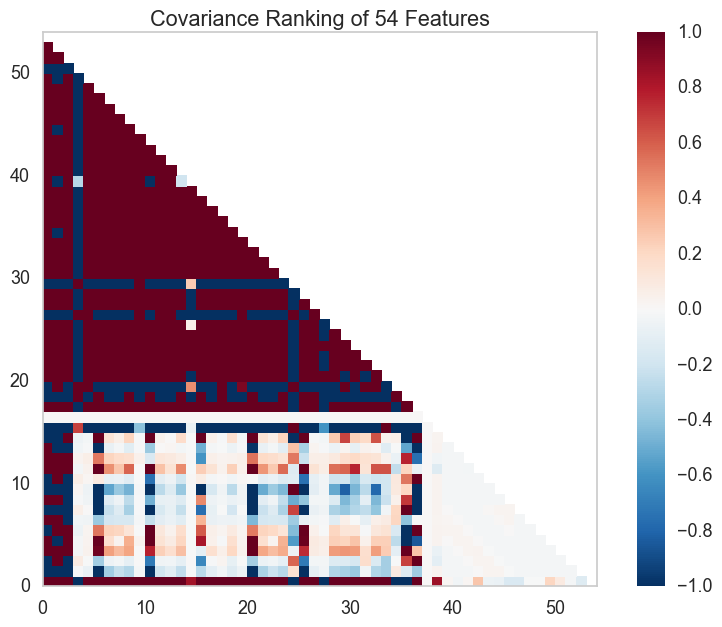

In [7]:
# Instantiate the visualizer with the Covariance ranking algorithm 
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

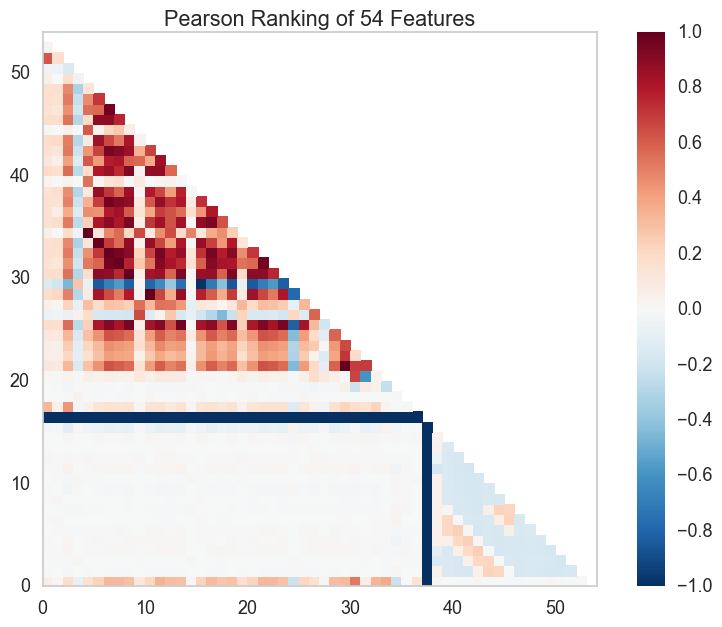

In [8]:
# Instantiate the visualizer with the Pearson ranking algorithm 
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()    # Draw/show/poof the data

## Data Extraction 

Create a bunch object to store data on disk. 

- **data**: array of shape `n_samples` * `n_features`
- **target**: array of length `n_samples`
- **feature_names**: names of the features
- **filenames**: names of the files that were loaded
- **DESCR**: contents of the readme



In [9]:
from sklearn.datasets.base import Bunch
DATA_DIR = os.path.abspath(os.path.join(".", "..", "pbwitt","data")) 
   # Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print ("- {}".format(name))

def load_data(root=DATA_DIR):
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'Features_Variant_1.csv'),
        
    }
    
    #Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)     
        feature_names = meta['feature_names']    

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()


    # Load the dataset from the data  file.
    dataset = pd.read_csv(filenames['data'], header=None)
    #tranform to numpy
    data   = dataset.iloc[:,0:53] 
    target = dataset.iloc[:,-1] 
    
    # Extract the target from the data
    data   = np.array(data)   
    target = np.array(target)

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
      
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)    
    

- Features_Variant_1.arff
- Features_Variant_1.csv
- Features_Variant_2.arff
- Features_Variant_2.csv
- Features_Variant_3.arff
- Features_Variant_3.csv
- Features_Variant_4.arff
- Features_Variant_4.csv
- Features_Variant_5.arff
- Features_Variant_5.csv
- meta.json
- README.md
(40949, 53)
(40949,)


In [10]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [11]:
from sklearn import metrics
from sklearn import cross_validation
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import KFold


# Build and Score Regression Models 

* Create function -- add parameters for Yellowbrick target visulizations  
* Score models using Mean Absolute Error, Mean Squared Error, Median Absolute Error, R2

In [12]:
def fit_and_evaluate(dataset, model, label,vis, **kwargs ):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'Mean Absolute Error:':[], 'Mean Squared Error:':[], 'Median Absolute Error':[], 'R2':[]}
    
    for train, test in KFold(dataset.data.shape[0], n_folds=12, shuffle=True):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
      
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        #For Visulizer below 
        if vis=='Ridge_vis':
            return [X_train,y_train,X_test,y_test]
        if vis=='Lasso_vis':
            return [X_train,y_train,X_test,y_test]
            
    
        scores['Mean Absolute Error:'].append(metrics.mean_absolute_error(expected, predicted))
        scores['Mean Squared Error:'].append(metrics.mean_squared_error(expected, predicted))
        scores['Median Absolute Error'].append(metrics.median_absolute_error(expected, predicted ))
        scores['R2'].append(metrics.r2_score(expected, predicted))  

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))

Lasso Scores and Visualization Below: 



/Users/pwitt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Build and Validation of Facebook Lasso took 16.674 seconds
Validation scores are as follows:

Mean Absolute Error:       8.270001
Mean Squared Error:      883.090939
Median Absolute Error      4.094740
R2                         0.318446
dtype: float64

Fitted model written to:
/Users/pwitt/Desktop/yellowbrick/examples/pbwitt/facebook-lasso.pickle


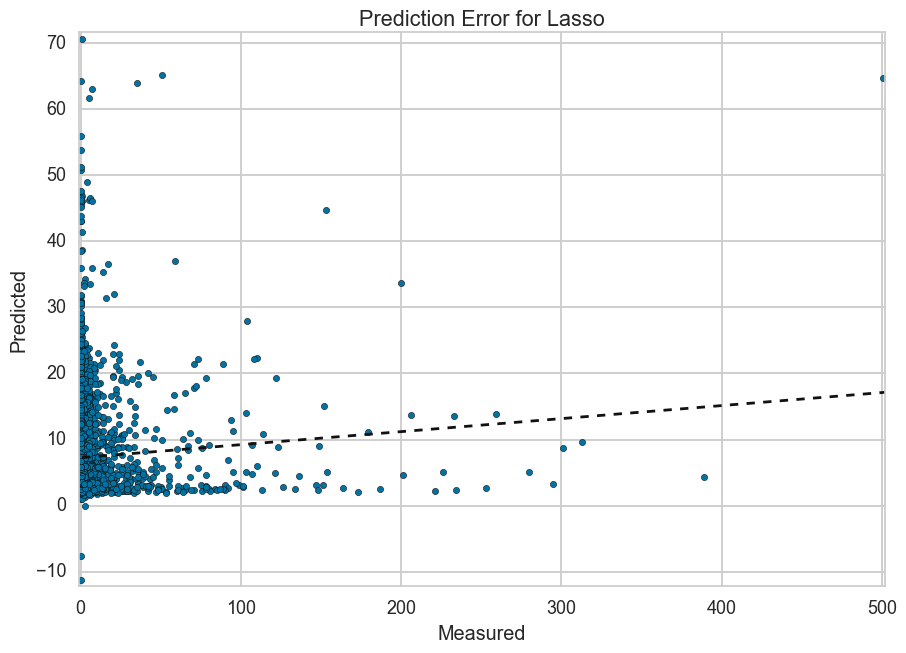

In [13]:
print("Lasso Scores and Visualization Below: \n")
fit_and_evaluate(dataset, Lasso, "Facebook Lasso",'NA')
# Instantiate the linear model and visualizer 
lasso = Lasso()
visualizer = PredictionError(lasso)
visualizer.fit(fit_and_evaluate(dataset, Lasso, "X_train",'Lasso_vis')[0], fit_and_evaluate(dataset, Lasso, "y_train",'Lasso_vis')[1])  # Fit the training data to the visualizer
visualizer.score(fit_and_evaluate(dataset, Lasso, "X_train",'Lasso_vis')[2], fit_and_evaluate(dataset, Lasso, "y_train",'Lasso_vis')[3])
g = visualizer.poof()             # Draw/show/poof the data

Ridge Scores and Target Visualization Below:

Build and Validation of Facebook  Ridge took 0.440 seconds
Validation scores are as follows:

Mean Absolute Error:       8.367239
Mean Squared Error:      881.948637
Median Absolute Error      4.169019
R2                         0.301782
dtype: float64

Fitted model written to:
/Users/pwitt/Desktop/yellowbrick/examples/pbwitt/facebook--ridge.pickle


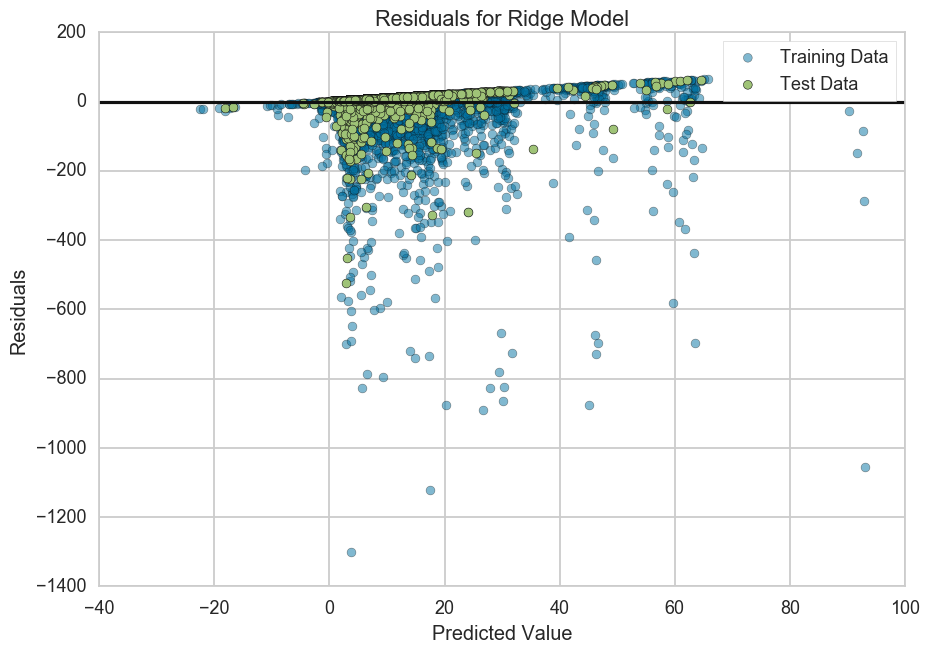

In [14]:
# Instantiate the linear model and visualizer 
print("Ridge Scores and Target Visualization Below:\n")
fit_and_evaluate(dataset, Ridge, "Facebook  Ridge", 'NA')

ridge = Ridge()
visualizer = ResidualsPlot(ridge)
visualizer.fit(fit_and_evaluate(dataset, Ridge, "X_train",'Ridge_vis')[0], fit_and_evaluate(dataset, Ridge, "y_train",'Ridge_vis')[1])  # Fit the training data to the visualizer
visualizer.score(fit_and_evaluate(dataset, Ridge, "X_train",'Ridge_vis')[2], fit_and_evaluate(dataset, Ridge, "y_train",'Ridge_vis')[3])  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data

In [15]:
fit_and_evaluate(dataset, ElasticNet, "Facebook ElasticNet", 'NA')

/Users/pwitt/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Build and Validation of Facebook ElasticNet took 15.888 seconds
Validation scores are as follows:

Mean Absolute Error:       8.311814
Mean Squared Error:      882.415546
Median Absolute Error      4.139396
R2                         0.301708
dtype: float64

Fitted model written to:
/Users/pwitt/Desktop/yellowbrick/examples/pbwitt/facebook-elasticnet.pickle
